## Chapter 1. Exploratory Data Analysis
필요한 패키지들을 먼저 설치해줍니다.

In [ ]:
DATA = 'c:\\Users\\jmjwj\\workspace\\HD'

AIRLINE_STATS_CSV = DATA + '/airline_stats.csv'
KC_TAX_CSV = DATA +'/kc_tax.csv.gz'
LC_LOANS_CSV = DATA + '/lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA + '/dfw_airline.csv'
SP500_DATA_CSV = DATA + '/sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA + '/sp500_sectors.csv'
STATE_CSV = DATA + '/state.csv'

In [4]:
%matplotlib inline 
# 코드 셀 바로 아래에 그래프를 표시하기 위함

from pathlib import Path # 파일 경로를 쉽게 다루기 위한 툴
import pandas as pd # 데이터 처리 툴
import numpy as np # 데이터 처리 툴
from scipy.stats import trim_mean 
from statsmodels import robust 
import wquantiles # 분위수 계산 툴
import seaborn as sns # 시각화 툴
import matplotlib.pylab as plt # 시각화 툴

데이터를 불러오기 위한 경로를 설정합니다. 반드시 필요한 csv 파일이 경로 상에 위치해야 파일을 불러올 수 있습니다.

In [7]:
DATA = 'c:\\Users\\jmjwj\\workspace\\HD'

AIRLINE_STATS_CSV = DATA + '/airline_stats.csv'
KC_TAX_CSV = DATA +'/kc_tax.csv.gz'
LC_LOANS_CSV = DATA + '/lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA + '/dfw_airline.csv'
SP500_DATA_CSV = DATA + '/sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA + '/sp500_sectors.csv'
STATE_CSV = DATA + '/state.csv'

## Estimates of Location(위치)

### Example: Location Estimates of Population and Murder Rates

In [8]:
state = pd.read_csv(STATE_CSV)
print(state.head(8)) # 맨 위 8개 항목만 확인하기

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


평균, 중위값, 절삭평균(trimmed mean)을 구해보자

In [9]:
print(state['Population'].mean())
print(state['Population'].median())
print(trim_mean(state['Population'], 0.1))
# 절삭평균은 scipy.stats 패키지 내에 구현되어있다.
# 양 끝단에서 10% 씩 잘라낸 데이터의 평균을 구한다.
# 절삭평균과 중앙값이 평균값보다 작다. 이는 모집단에 값이 큰 특이값이 많이 존재할 것으로 추론할 수 있다.

6162876.3
4436369.5
4783697.125


가중평균, 가중중위수를 구해보자


In [10]:
print(state['Murder.Rate'].mean())
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.066
4.445833981123393
4.4


여기서 가중평균/중위수가 의미하는 것이 무엇일까?

$Murder Rate=(Number of Murders / population)×100,000$ 
즉, 가중치를 population으로 두고 murder.rate의 가중평균을 구하면, 모든 주를 합친 것의 murder.rate를 알 수 있을 것이다. 

## Estimates of Variability(산포)
표준편차, 3사분위수와 1사분위수의 차이, MAD(Median Absoulte Deviation)

In [15]:
print(state['Population'].std()) # 표준편차
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25)) #IQR

print(robust.scale.mad(state['Population'])*0.6744897501960817) ##?
print(abs(state['Population'] - state['Population'].median()).median())

6848235.347401142
4847308.0
2596702.0
2596702.0


## Percentiles and Boxplots

In [16]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


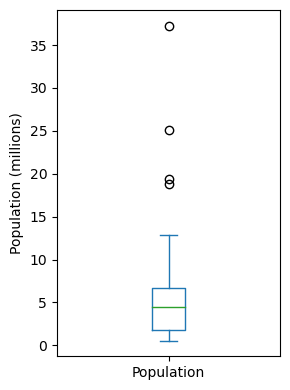

In [28]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
#단위를 1백만으로 scaling 한 후, boxplot을 그림

#customizing
ax.set_ylabel('Population (millions)')
plt.tight_layout()

plt.show()


## Frequency Table and Histograms


In [22]:
# Frequency table을 그리기 위해선 데이터가 존재하는 구간을 적절한 구역들로 나누고,
# 구역 별 Count를 조사해야한다.

binnedPopulation = pd.cut(state['Population'], 10) 
binnedPopulation # 각 데이터를 구간에 할당시킨 값을 반환한다.
print(binnedPopulation.value_counts())


Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


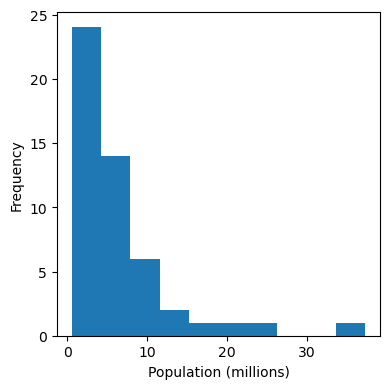

In [29]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
#위의 box plot을 그릴 때와 문법이 비슷하다

ax.set_xlabel('Population (millions)')
plt.tight_layout()

plt.show()

'density=True' 명령을 통해 빈도가 아닌 밀도를 표현할 수 있다.

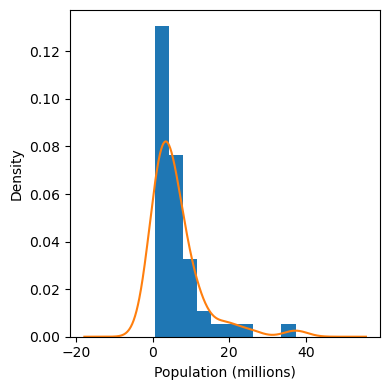

In [30]:
ax = (state['Population'] / 1_000_000).plot.hist(density=True,  figsize=(4, 4))
(state['Population'] / 1_000_000).plot.density(ax=ax)

#customizing
ax.set_xlabel('Population (millions)')
ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

## Binary and Categorical Data

In [31]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV) 
dfw

# 원인별 항공기 지연시간을 나타낸 데이터이다.

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


비율로 나타내기



In [32]:
print(100 * dfw / dfw.values.sum())


     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Bar plot으로 나타내기



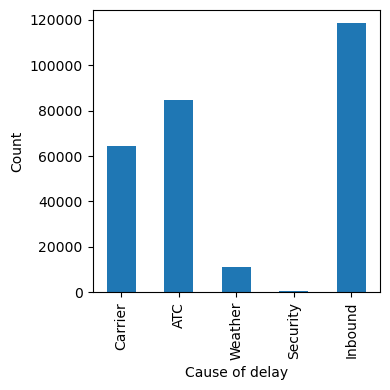

In [35]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
#transpose를 해주는 이유? X축에 각 원인을 대응시키기 위해서.

#customizing
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

## Correlation

In [42]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [43]:
sp500_sym
#sp500 각 주식별 섹터를 정리해둔 데이터.


,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


섹터가 telecommunications_services인 데이터만 뽑아서, 여기 포함된 회사들은 무엇인지 살펴보자.

In [45]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [47]:
sp500_px.head(5)
# 각 날짜별, 각 주식가격의 변동을 나타낸 데이터.

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [48]:
sp500_px.loc[sp500_px.index >= '2012-07-01'].head(5)
#2012년 7월 이후의 데이터만 보자

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
2012-07-02,1.190002,-0.224999,-0.055103,-0.560002,-0.455000,-0.104774,-0.279545,-0.495967,-0.018692,-0.152205,...,-0.970001,3.830002,1.257135,0.0,2.110001,0.105000,0.219207,5.610000,-0.539997,-0.189994
2012-07-03,0.440002,0.125998,0.486724,0.849998,0.165001,0.219071,0.308464,0.439807,0.093461,0.409055,...,1.090004,-0.510002,1.058641,0.0,0.100006,0.440002,0.274009,1.300003,-0.170002,0.519997
2012-07-05,-0.369995,-0.116998,0.101019,0.459999,0.395001,-0.038100,-0.269906,0.383662,0.186922,-0.475645,...,0.690003,-0.489998,0.255211,0.0,-0.600006,-0.175003,-0.283971,-0.630005,0.000000,0.369995
2012-07-06,0.319992,-0.476996,-0.385706,-2.159999,-0.920000,-0.523868,-0.279546,-2.348823,0.074769,-0.742004,...,-1.330001,-1.980003,-0.396989,0.0,-1.569992,-0.170002,-0.254081,-0.659996,-0.869999,-0.970002
2012-07-09,-0.070007,-0.152999,-0.110203,-1.880001,-0.139999,-0.114299,-0.279544,-1.020006,-0.084115,-0.494672,...,-1.029999,-0.599999,0.680554,0.0,0.220002,0.069999,0.194296,-2.349998,-1.310002,-0.350006


In [50]:
# 2012년 7월 이후의 데이터 중, 관심있는 telecom 관련 회사들의 주가변동 데이터만 찾아보자.

telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [51]:
telecom.corr()

# telecom 회사들 간의 주가변동의 상관계수 행렬이다.
# 예를들어, T와 VZ의 상관계수는 0.67으로, T와 VZ의 주가변동 양상이 어느정도 비슷하다고 해석할 수 있다.

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


만약 변수가 많은 경우에 correlation matrix를 한눈에 파악하기 힘들다. 이때는 seaborn package를 사용해서 Heatmap을 그릴 수 있다.

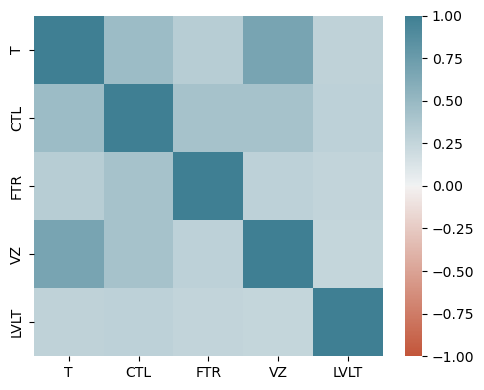

In [52]:
fig, ax = plt.subplots(figsize=(5, 4)) #그림을 그릴 도화지 크기를 설정하는 코드라고 보면 된다.

ax = sns.heatmap(telecom.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)
# 행렬을 heatmap 함수에 전달을 하면, 대응되는 행렬에 맞게 시각화 해준다.
 
plt.tight_layout()
plt.show()

## Scatterplot

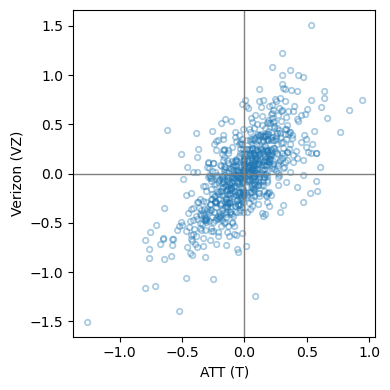

In [53]:
# T와 VZ의 주가변동을 산점도로 표현해보자.
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha = 0.3)


ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')

#가로-세로선을 그려준다. (0,0)
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

### scatterplot을 그리고 싶은데 많은 점들이 겹치는 경우

1. hexagonal binning -> 육각형 모양으로 된 플롯.
2. contours -> 등고선

In [57]:
kc_tax # 워싱턴 주의 king county의 주택 시설에 대한 과세 평가 금액 정보를 담고있는 데이터.

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


(432693, 3)


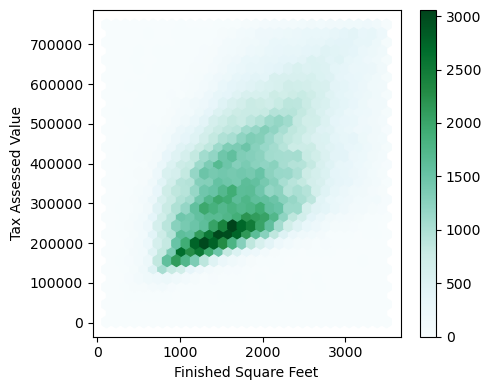

In [54]:
#hexagonal binning

kc_tax = pd.read_csv(KC_TAX_CSV)

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
#과세평가 금액이 750000 미만, 주택면적이 100 초과 3500 미만인 주택들에 대한 데이터만 보도록 하자.

print(kc_tax0.shape) # 데이터 행렬의 차원.


# plot
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
#상응하는 육각형 면적에 해당되는 주택의 수를 색으로 표현함
#히스토그램의 2차원 확장이라고 봐도 될 것 같다.

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

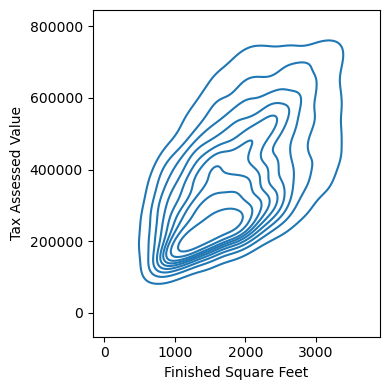

In [55]:
# contours

fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
# 등고선의 개념을 데이터 count를 표현하는데 나타낸 것임.

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

#위의 hexagonal binning의 색이 짙은 부분과, kde플롯의 고점의 위치가 동일한 것을 확인 할 수 있다.

## Categorical Variables
pivot_table 함수를 사용해서 분할표 만들기

In [58]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans

# 변수가 범주형이다.

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [63]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)

# (index, column)에 따라 데이터를 분류하고, 각각의 그룹에 aggfunc를 적용하여 분할표를 산출한다.

print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


## Categorical and Numeric Data


In [65]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats
# 항공사별 각 일의 비행 지연 비율을 나타낸 데이터이다.

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


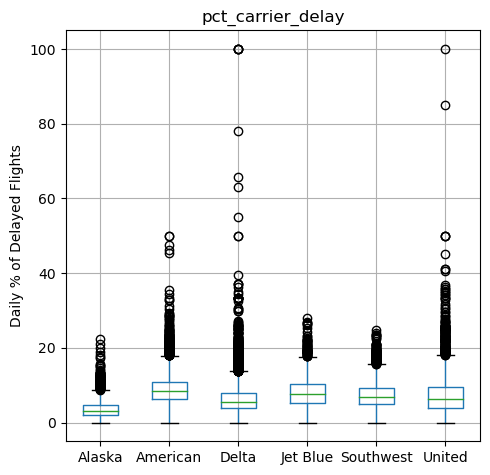

In [69]:
airline_stats.head()

ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
# 항공사 별로, 항공사 과실의 지연비율을 boxplot으로 표현

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')
plt.tight_layout()
plt.show()

# Alaska 항공이 항공사 과실 지연비율이 가장 낮고, American 항공의 비율이 가장 높은 것으로 보인다.

만일 산포를 함께 표현하고 싶다면 violin plot을 사용한다.



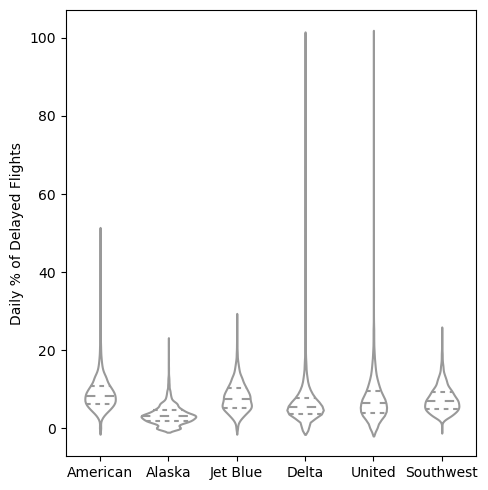

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables(참고)


In [71]:
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_23344\1414356911.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


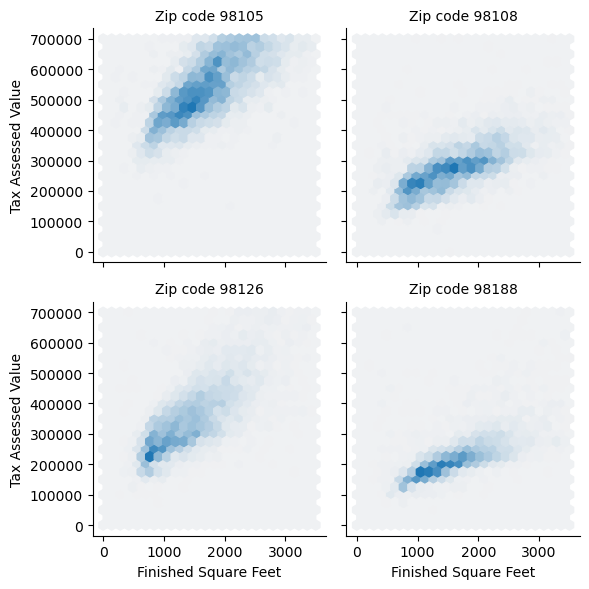

In [76]:
zip_codes = [98188, 98105, 98108, 98126] 
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip # 특정 우편번호(지역)의 데이터만 모아둔 데이터이다.


def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)


g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
# FacetGrid 객체
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
#각 Grid에 그래프를 매핑. map메서드를 사용하기 위해 hexbin함수를 정의한 것이다.

g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()